In [4]:
# Clasificador de arbol de decisiones
from sklearn.tree import DecisionTreeClassifier
# Dos set de datos uno de cancer y otro de iris
from sklearn.datasets import load_breast_cancer, load_iris
# Librería para separar datos de entrenamiento y testing
from sklearn.model_selection import train_test_split
# Estos últimos son para poder mostrar gráficamente el arbol de decisiones
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Carga de los datos IRIS a una variable
iris = load_iris()

In [6]:
# Las variables _ent son las que se usarán para entrenamiento y testing
# Target son las etiquetas y data y son las características
X_ent, X_test, y_ent, y_test = train_test_split(iris.data, iris.target)

In [7]:
# Variable con el arbol de decisiones
arbol = DecisionTreeClassifier()

In [8]:
# Se le pasan los datos de entrenamiento y los valores guia
arbol.fit(X_ent, y_ent)

DecisionTreeClassifier()

In [21]:
# Con esto se averigua el % de aprendizaje. 
# Devuelve un 97% que no esta nada mal
arbol.score(X_test, y_test)

0.9473684210526315

In [22]:
# Se hace lo mismo sobre los datos de entrenamiento. En este caso devuelve el 100%.
# Parece ser que devuelva un 100% en los datos de entrenamiento no es muy bueno
arbol.score(X_ent, y_ent)

1.0

In [23]:
# Genera un archivo .dot con los datos del arbol.
# Al ejecutarlo aparece el archivo en el mismo directorio donde esta este script
export_graphviz(arbol, out_file='arbol.dot', class_names=iris.target_names, 
                feature_names=iris.feature_names,impurity=False,filled=True)

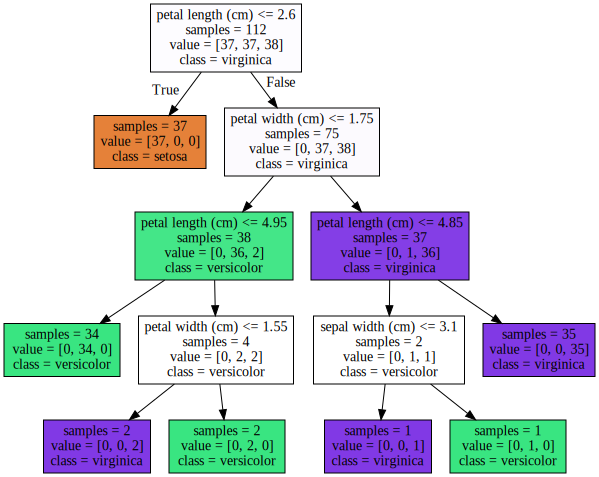

In [9]:
# Abre el fichero generado en el paso anterior, se lee en una variable 
with open('arbol.dot') as f:
    dot_graph=f.read()
# Se muestra el arbol de decisiones    
graphviz.Source(dot_graph)

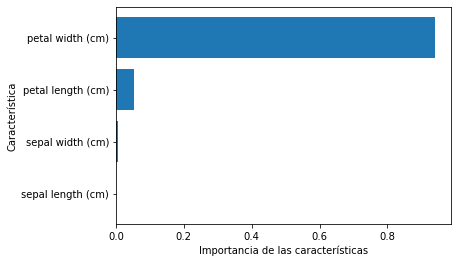

In [24]:
# Esto lo que nos dice que tan de importante es una característica especifica
# para ayudarnos a definir a la clase a la que pertenece.
# En el gráfico se mostrará la característica más importante es la longitud del petalo

# Caract obtenemos el número de características que tiene la tupla
caract = iris.data.shape[1]
# "feature_importances_" es la importancia de nuestras características
# Indica que va crear un gráfico de barras donde:
# El primer parámetro "y" tendrá cuatro registros, el número de características
# El segundo parámetro son los valores que se hará las características
plt.barh(range(caract),arbol.feature_importances_)
# Se le informan las etiquetas. El primer parámetro es un array en
# blanco(np.arange crea un array en base al número pasado). El segundo
# parámetro son los textos de la etiqueta
plt.yticks(np.arange(caract),iris.feature_names)
# Se le pasa el texto para el eje X e Y
plt.xlabel('Importancia de las características')
plt.ylabel('Característica')
plt.show()

In [25]:
# Se van ajustar los parámetros del clasificador para mejorar la precisión. 
# max_depth le indica cuantos niveles en la clasificación le permitimos. 
# Si inicialmente erán 6  niveles encontrados, según la gráfica ahora serán 3.
arbol = DecisionTreeClassifier(max_depth=3)

In [26]:
# Se vuevle a entrenar
arbol.fit(X_ent, y_ent)

DecisionTreeClassifier(max_depth=3)

In [27]:
# El resultado con los datos de test son del 94%
arbol.score(X_test,y_test)

0.9473684210526315

In [28]:
# El resultado con los datos de entrenamiento es del 97%, antes era del 100%
arbol.score(X_ent, y_ent)

0.9910714285714286

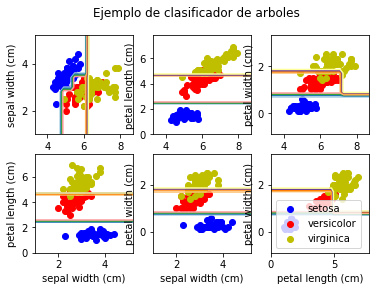

In [10]:
 # Ejemplo de como se muestra gráficamente como 
 # realiza la clasificación el algoritmo. Se usa la
 # librería Matplotlib para visualizarlo
 n_classes = 3
 plot_color = "bry"
 plot_step = 0.2

 for pairidx, pair in enumerate([[0,1], [0, 2],[0, 3],
                               [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]                        
    y = iris.target

    # Entrenar algoritmo
    # Sin usar la opción max_depth=3 en la gráfica se ven unas rayas, como las rojas, 
    # que son debidas a los sobreajustes. Esta raya le sirve al modelo para clasificar
    # a futuro uno de los elementos. Entonces en un futuro cuando un elemento caigan 
    # en esas rayas lo va a clasificar de manera incorrecta.
    # Si se pone ela opción max_depth=3 esas rayas ya no se ven. Ya no hay sobreajuste
    # en el entrenamiento
    clf = DecisionTreeClassifier(max_depth=3).fit(X,y)
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training point
    for i, color in zip(range(n_classes), plot_color):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c = color, label = iris.target_names[i],
                    cmap=plt.cm.Paired)
    
    plt.axis("tight")

plt.suptitle("Ejemplo de clasificador de arboles")
plt.legend()
plt.show()